In [12]:
import numpy as np
import os
import h5py
import sys
import pathlib

In [13]:
folder = pathlib.Path('C:/Users/giaco/OneDrive/Desktop/LOUVAIN-LA-NEUVE/MODELING/HybriDFEM-3-master FINAL/Objects')
sys.path.append(str(folder))

import Structure as st
import Material as mat
import Surface as surf
import Contact as ct
import ContactPair as cp

save_path = os.getcwd()

In [14]:
E_URM = 5.46e9
nu_URM = 0.2
rho_URM = 1700

E_RC = 24.06e9
nu_RC = 0
rho_RC = 2400

kn = 41e9  #Pa/m (from UDEC, see Tondelli-Beyer-deJong paper)
ks = kn / (2 * (1 + nu_URM))

mu = 0.7
c = 0.209e6  #Pa (from UDEC, see Tondelli-Beyer-deJong paper)
ft = 0.055e6  #Pa (from UDEC, see Tondelli-Beyer-deJong paper)

B = 95e-3
H_URM = 1.545
H_RC = 1
H_SLAB = 0.15
H1 = 0.15

#H_URM = .3
#H_RC = .2
#H_SLAB = 0.1

BLOCKS = 14

#kn = 14 * E_URM * H_URM * B / 1.5
#ks = kn / (2*(1+nu_URM))

St = st.Structure_2D()

N0 = np.array([3.2, 0.2], dtype=float)

N1 = np.array([1.1925, 0.45], dtype=float)
N2 = np.array([3.5175, 0.45], dtype=float)
N3 = np.array([5.48, 0.45], dtype=float)

N4 = np.array([1.1925, 1.95], dtype=float)
N5 = np.array([3.5175, 1.95], dtype=float)
N6 = np.array([5.48, 1.95], dtype=float)

N7 = np.array([1.1925, 3.45], dtype=float)
N8 = np.array([3.5175, 3.45], dtype=float)
N9 = np.array([5.48, 3.45], dtype=float)

N10 = np.array([1.1925, 4.95], dtype=float)
N11 = np.array([3.5175, 4.95], dtype=float)
N12 = np.array([5.48, 4.95], dtype=float)

N13 = np.array([1.1925, 6.45], dtype=float)
N14 = np.array([3.5175, 6.45], dtype=float)
N15 = np.array([5.48, 6.45], dtype=float)

#extra to split each FE in 2 parts

N16 = np.array([2.355, 1.95], dtype=float)
N17 = np.array([4.49875, 1.95], dtype=float)

N18 = np.array([2.355, 3.45], dtype=float)
N19 = np.array([4.49875, 3.45], dtype=float)

N20 = np.array([2.355, 4.95], dtype=float)
N21 = np.array([4.49875, 4.95], dtype=float)

N22 = np.array([2.355, 6.45], dtype=float)
N23 = np.array([4.49875, 6.45], dtype=float)

N24 = np.array([1.1925, 1.20], dtype=float)
N25 = np.array([3.5175, 1.20], dtype=float)
N26 = np.array([5.48, 1.20], dtype=float)

N27 = np.array([1.1925, 2.70], dtype=float)
N28 = np.array([3.5175, 2.70], dtype=float)
N29 = np.array([5.48, 2.70], dtype=float)

N30 = np.array([1.1925, 4.20], dtype=float)
N31 = np.array([3.5175, 4.20], dtype=float)
N32 = np.array([5.48, 4.20], dtype=float)

N33 = np.array([3.5175, 5.70], dtype=float)
N34 = np.array([5.48, 5.70], dtype=float)

# add FEs (adjust H and b)
St.add_fe(N1, N24, E_URM, nu_URM, H_URM, b=B, lin_geom=False, rho=rho_URM)
St.add_fe(N24, N4, E_URM, nu_URM, H_URM, b=B, lin_geom=False, rho=rho_URM)
St.add_fe(N2, N25, E_URM, nu_URM, H_URM, b=B, lin_geom=False, rho=rho_URM)
St.add_fe(N25, N5, E_URM, nu_URM, H_URM, b=B, lin_geom=False, rho=rho_URM)
St.add_fe(N3, N26, E_RC, nu_RC, H_RC, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N26, N6, E_RC, nu_RC, H_RC, b=B, lin_geom=False, rho=rho_RC)

St.add_fe(N4, N16, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N16, N5, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N5, N17, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N17, N6, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)

St.add_fe(N4, N27, E_URM, nu_URM, H_URM, b=B, lin_geom=False, rho=rho_URM)
St.add_fe(N27, N7, E_URM, nu_URM, H_URM, b=B, lin_geom=False, rho=rho_URM)
St.add_fe(N5, N28, E_URM, nu_URM, H_URM, b=B, lin_geom=False, rho=rho_URM)
St.add_fe(N28, N8, E_URM, nu_URM, H_URM, b=B, lin_geom=False, rho=rho_URM)
St.add_fe(N6, N29, E_RC, nu_RC, H_RC, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N29, N9, E_RC, nu_RC, H_RC, b=B, lin_geom=False, rho=rho_RC)

St.add_fe(N7, N18, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N18, N8, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N8, N19, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N19, N9, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)

St.add_fe(N7, N30, E_URM, nu_URM, H_URM, b=B, lin_geom=False, rho=rho_URM)
St.add_fe(N30, N10, E_URM, nu_URM, H_URM, b=B, lin_geom=False, rho=rho_URM)
St.add_fe(N8, N31, E_URM, nu_URM, H_URM, b=B, lin_geom=False, rho=rho_URM)
St.add_fe(N31, N11, E_URM, nu_URM, H_URM, b=B, lin_geom=False, rho=rho_URM)
St.add_fe(N9, N32, E_RC, nu_RC, H_RC, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N32, N12, E_RC, nu_RC, H_RC, b=B, lin_geom=False, rho=rho_RC)

St.add_fe(N10, N20, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N20, N11, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N11, N21, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N21, N12, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)

St.add_fe(N11, N33, E_URM, nu_URM, H_URM, b=B, lin_geom=False, rho=rho_URM)
St.add_fe(N33, N14, E_URM, nu_URM, H_URM, b=B, lin_geom=False, rho=rho_URM)
St.add_fe(N12, N34, E_RC, nu_RC, H_RC, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N34, N15, E_RC, nu_RC, H_RC, b=B, lin_geom=False, rho=rho_RC)

St.add_fe(N13, N22, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N22, N14, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N14, N23, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)
St.add_fe(N23, N15, E_RC, nu_RC, H_SLAB, b=B, lin_geom=False, rho=rho_RC)

St.add_beam(N10, N13, BLOCKS, H1, rho=rho_URM, b=B)

#SURF = surf.NoTension_EP(2*kn,2*ks)
SURF = surf.Coulomb(kn, ks, mu, c, ft)

St.make_nodes()
St.make_cfs(False, offset=-1, nb_cps=[-1, -.5, 0, .5, 1.], surface=SURF)

#St.plot_structure(scale=0, plot_cf=False, plot_forces=True) #undeformed configuration


13 interfaces detected


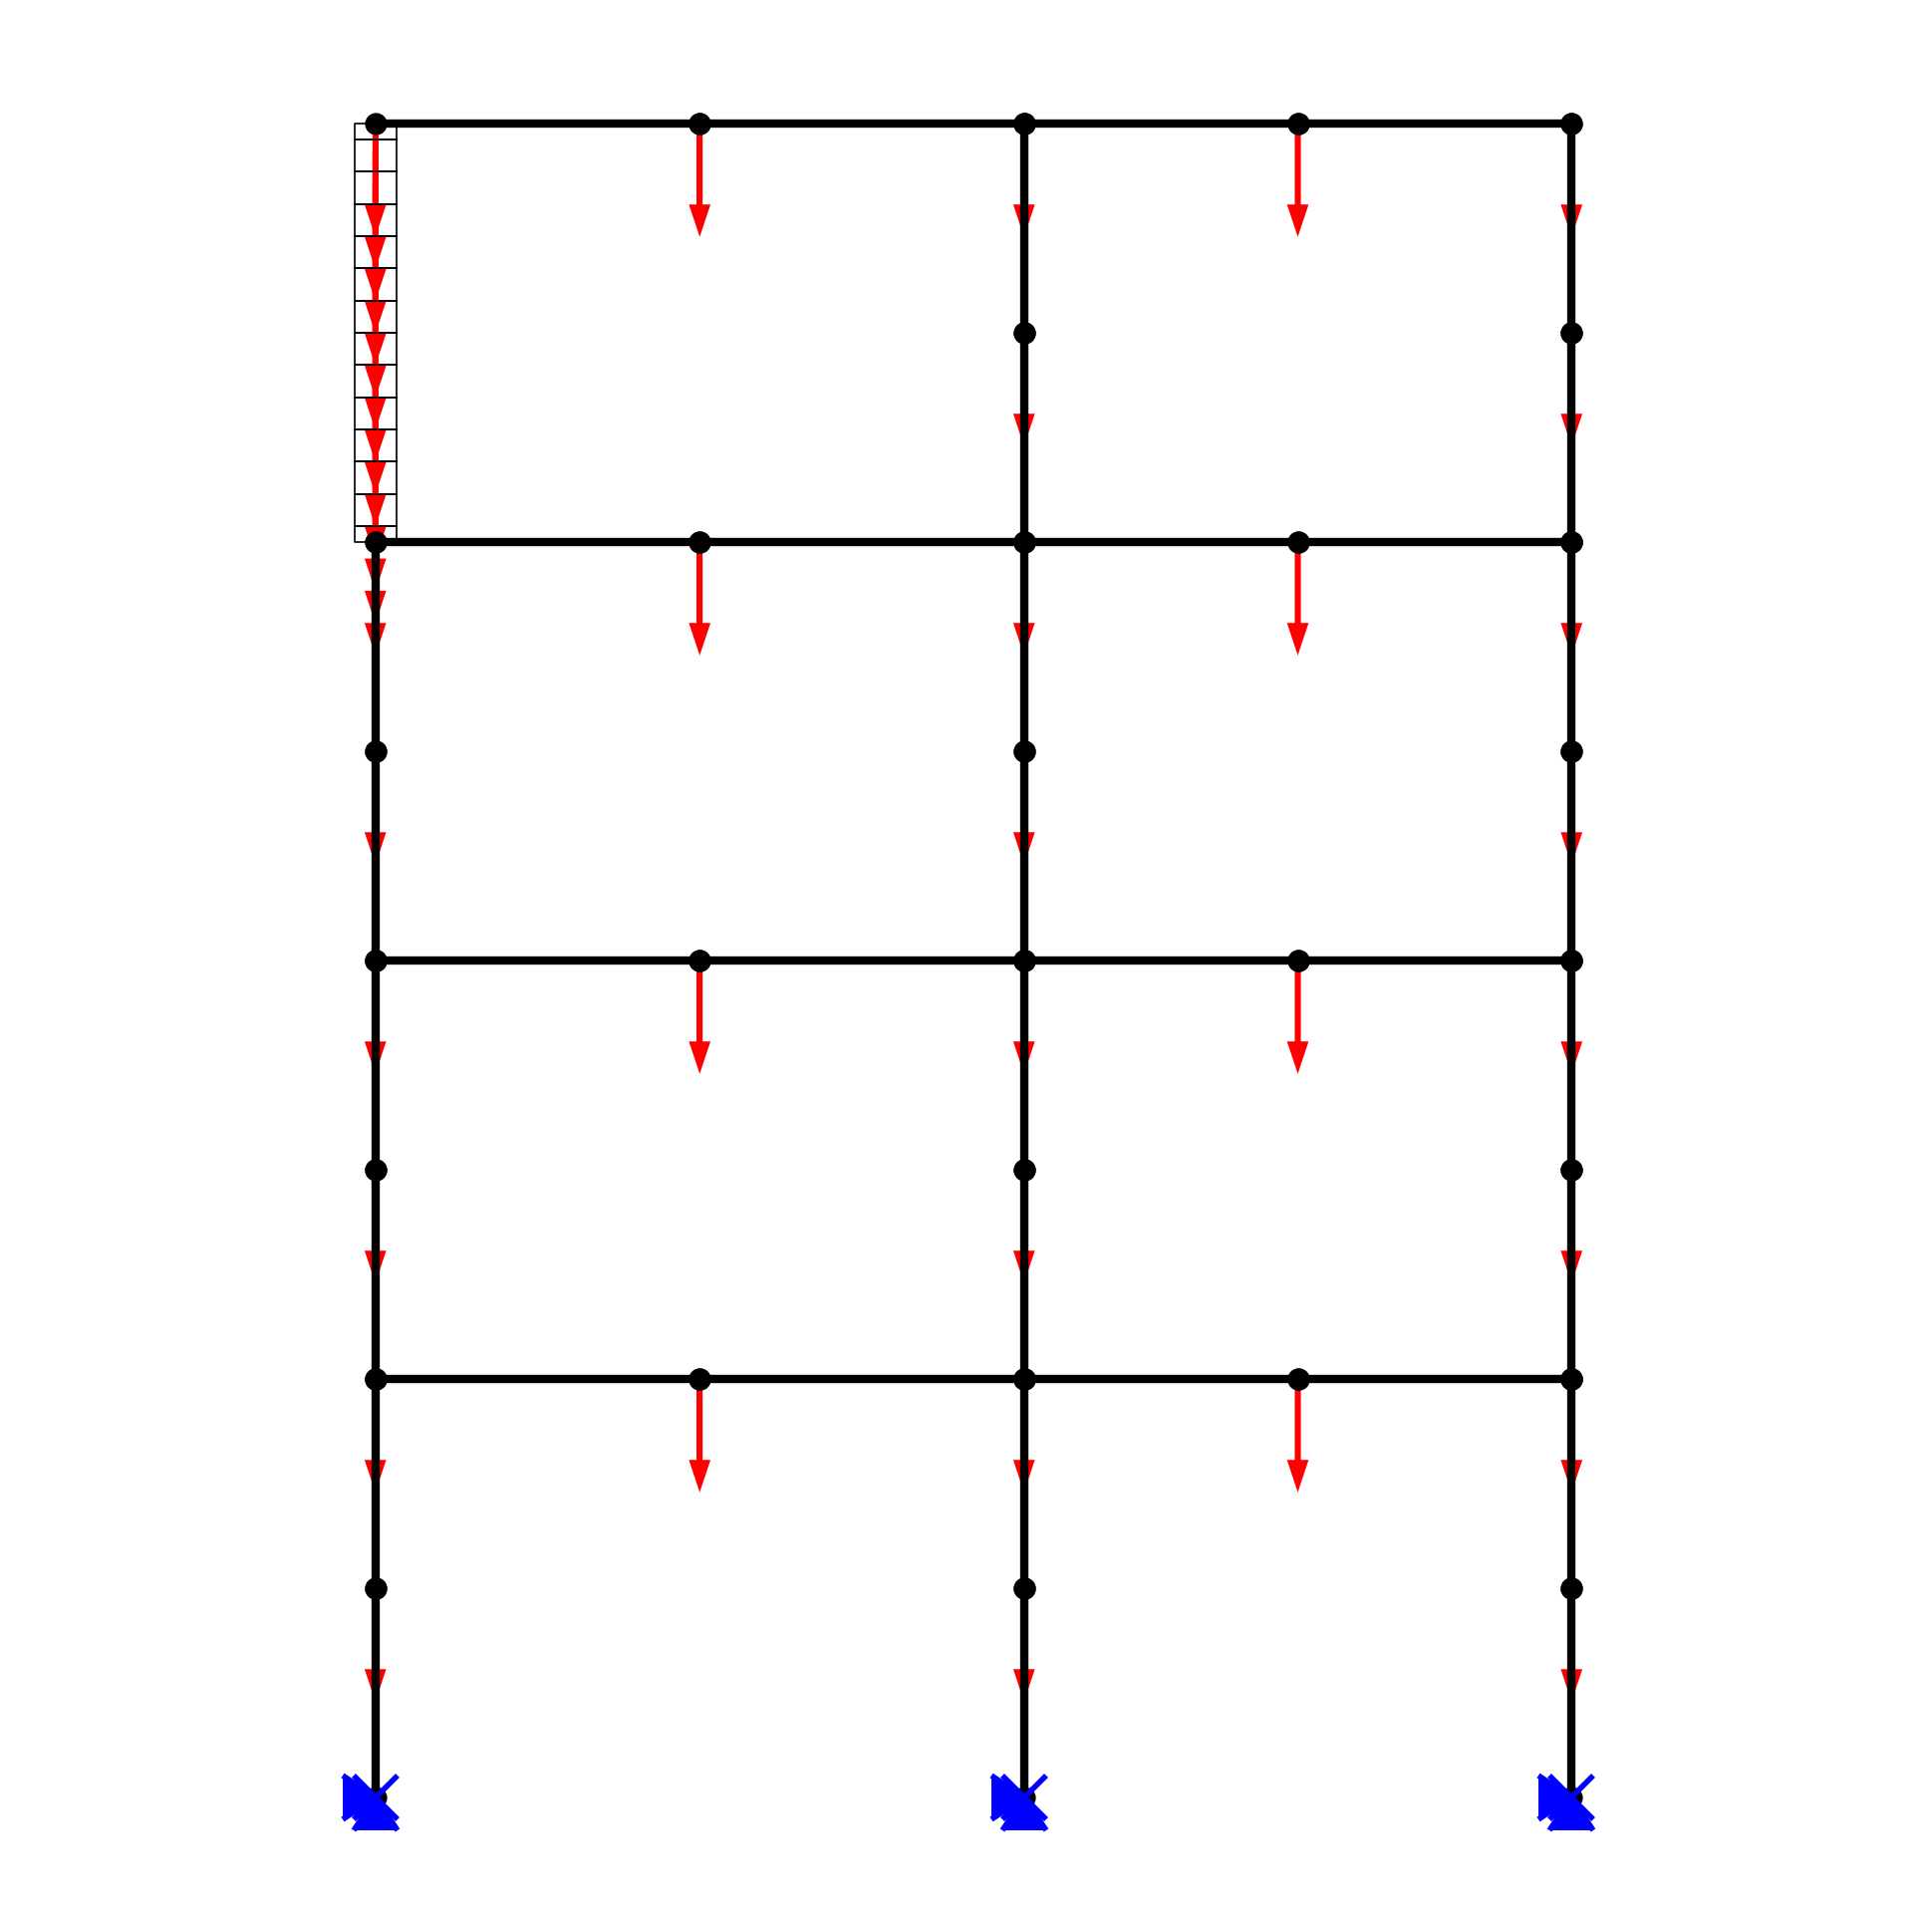

In [15]:
St.get_M_str()

for i in range(len(St.list_blocks)):
    W = St.list_blocks[i].m * 9.81
    N = St.list_blocks[i].ref_point
    Node = St.get_node_id(N)
    St.loadNode(Node, 1, -W, fixed=True)
    #St.loadNode(Node, 0, W)

for i in range(len(St.list_fes)):
    St.list_fes[i].get_mass()
    W = St.list_fes[i].mass[0, 0] * 9.81
    N_1 = St.list_fes[i].N1
    N_2 = St.list_fes[i].N2
    Node1 = St.get_node_id(N_1)
    Node2 = St.get_node_id(N_2)
    St.loadNode(Node1, 1, -W, fixed=True)
    St.loadNode(Node2, 1, -W, fixed=True)
    #St.loadNode(Node1, 0, W)
    #St.loadNode(Node2, 0, W)

#St.fixNode(N0, [0, 1, 2])
St.fixNode(N1, [0, 1, 2])
St.fixNode(N2, [0, 1, 2])
St.fixNode(N3, [0, 1, 2])

#St.fixNode(N10, [0, 1])
#St.fixNode(N13, [0, 1])

St.plot_structure(scale=0, plot_cf=False, plot_forces=True)  #undeformed configuration

## Scaling accelerations to PGA = 0.9 g

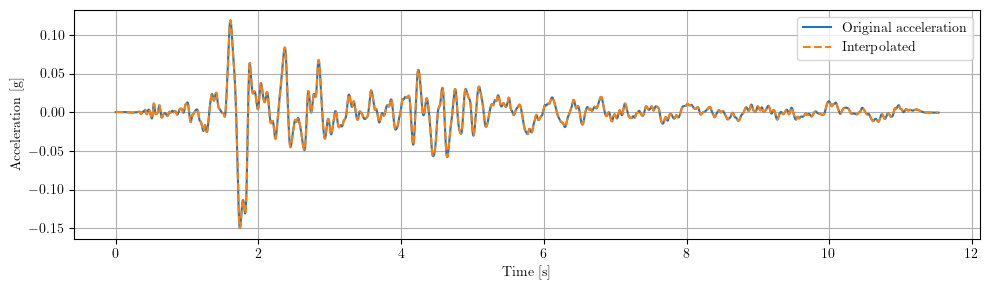

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


def read_accelerogram(filename):
    df = pd.read_csv(filename, header=64, engine="python")
    values = df.to_numpy()

    a = values.ravel()
    a = a[~np.isnan(a)]

    # converto da cm/s^2 -> m/s^2 -> g
    a = (a / 100.0) / 9.81

    # estraggo dt dalle righe di header
    with open(filename) as file:
        header = [next(file) for _ in range(64)]
    dt = 0.005
    for line in header:
        if "SAMPLING_INTERVAL_S" in line:
            dt = float(line.split(":")[1])
            break

    return dt, a


dt, acc = read_accelerogram("EU.ULA.00.HNE.D.ME-1979-0002.ACC.MP.ASC")
time = np.arange(len(acc)) * dt

# scaling a PGA = 0.9 g
pga = 0.15
acc_scaled = pga * acc / np.max(abs(acc))

# ricampionamento
dt_new = 1e-3
new_time = np.arange(time[0], time[-1], dt_new)
#new_time = np.arange(time[0], time[-1] + dt_new, dt_new)

interpolator = interp1d(time, acc_scaled, kind="linear", fill_value="extrapolate")
new_acc = interpolator(new_time)

# plot
plt.figure(figsize=(10, 3))
plt.plot(time, acc_scaled, label="Original acceleration")
plt.plot(new_time, new_acc, label="Interpolated", linestyle="--")
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [g]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Integrate to obtain displacements

File salvato: displacement_time_history.txt
Valori displacement: min=-5.3649e-03 m, max=1.0288e-02 m


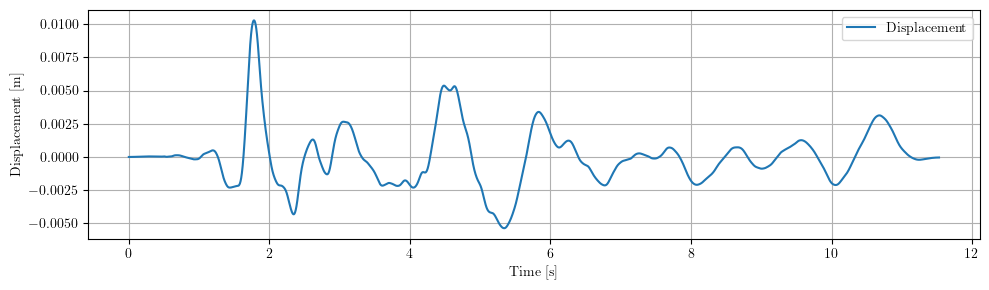

In [17]:
from scipy.integrate import cumulative_trapezoid
import numpy as np

# converto accelerazione da g -> m/s^2
g = 9.81
new_acc_m = new_acc * g  # [m/s^2]

# integrazione numerica
vel = cumulative_trapezoid(new_acc_m, new_time, initial=0)  # [m/s]
disp = cumulative_trapezoid(vel, new_time, initial=0)  # [m]

# Salvo su file .txt: due colonne time \t displacement
out_file = "displacement_time_history.txt"
with open(out_file, "w") as f:
    for t, u in zip(new_time, disp):
        f.write(f"{t:.6f}\t{u:.6e}\n")

print(f"File salvato: {out_file}")
print(f"Valori displacement: min={np.min(disp):.4e} m, max={np.max(disp):.4e} m")

# Plotto per controllo
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(new_time, disp, label="Displacement")
plt.xlabel("Time [s]")
plt.ylabel("Displacement [m]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
N1_id = St.get_node_id(N1)
N2_id = St.get_node_id(N2)
N3_id = St.get_node_id(N3)

print("ID nodo N1:", N1_id)
print("ID nodo N2:", N2_id)
print("ID nodo N3:", N3_id)

ID nodo N1: 14
ID nodo N2: 17
ID nodo N3: 20


## Dynamic excitation

11601
11601
Tolerance is 0.001
reached 0 seconds out of 11 seconds
reached 0.1 seconds out of 11 seconds
reached 0.2 seconds out of 11 seconds
reached 0.3 seconds out of 11 seconds
reached 0.4 seconds out of 11 seconds
reached 0.5 seconds out of 11 seconds
reached 0.6 seconds out of 11 seconds
reached 0.7 seconds out of 11 seconds
Step 738 did not converge
Simulation done in 0 h 2 m 0 s... writing results to file


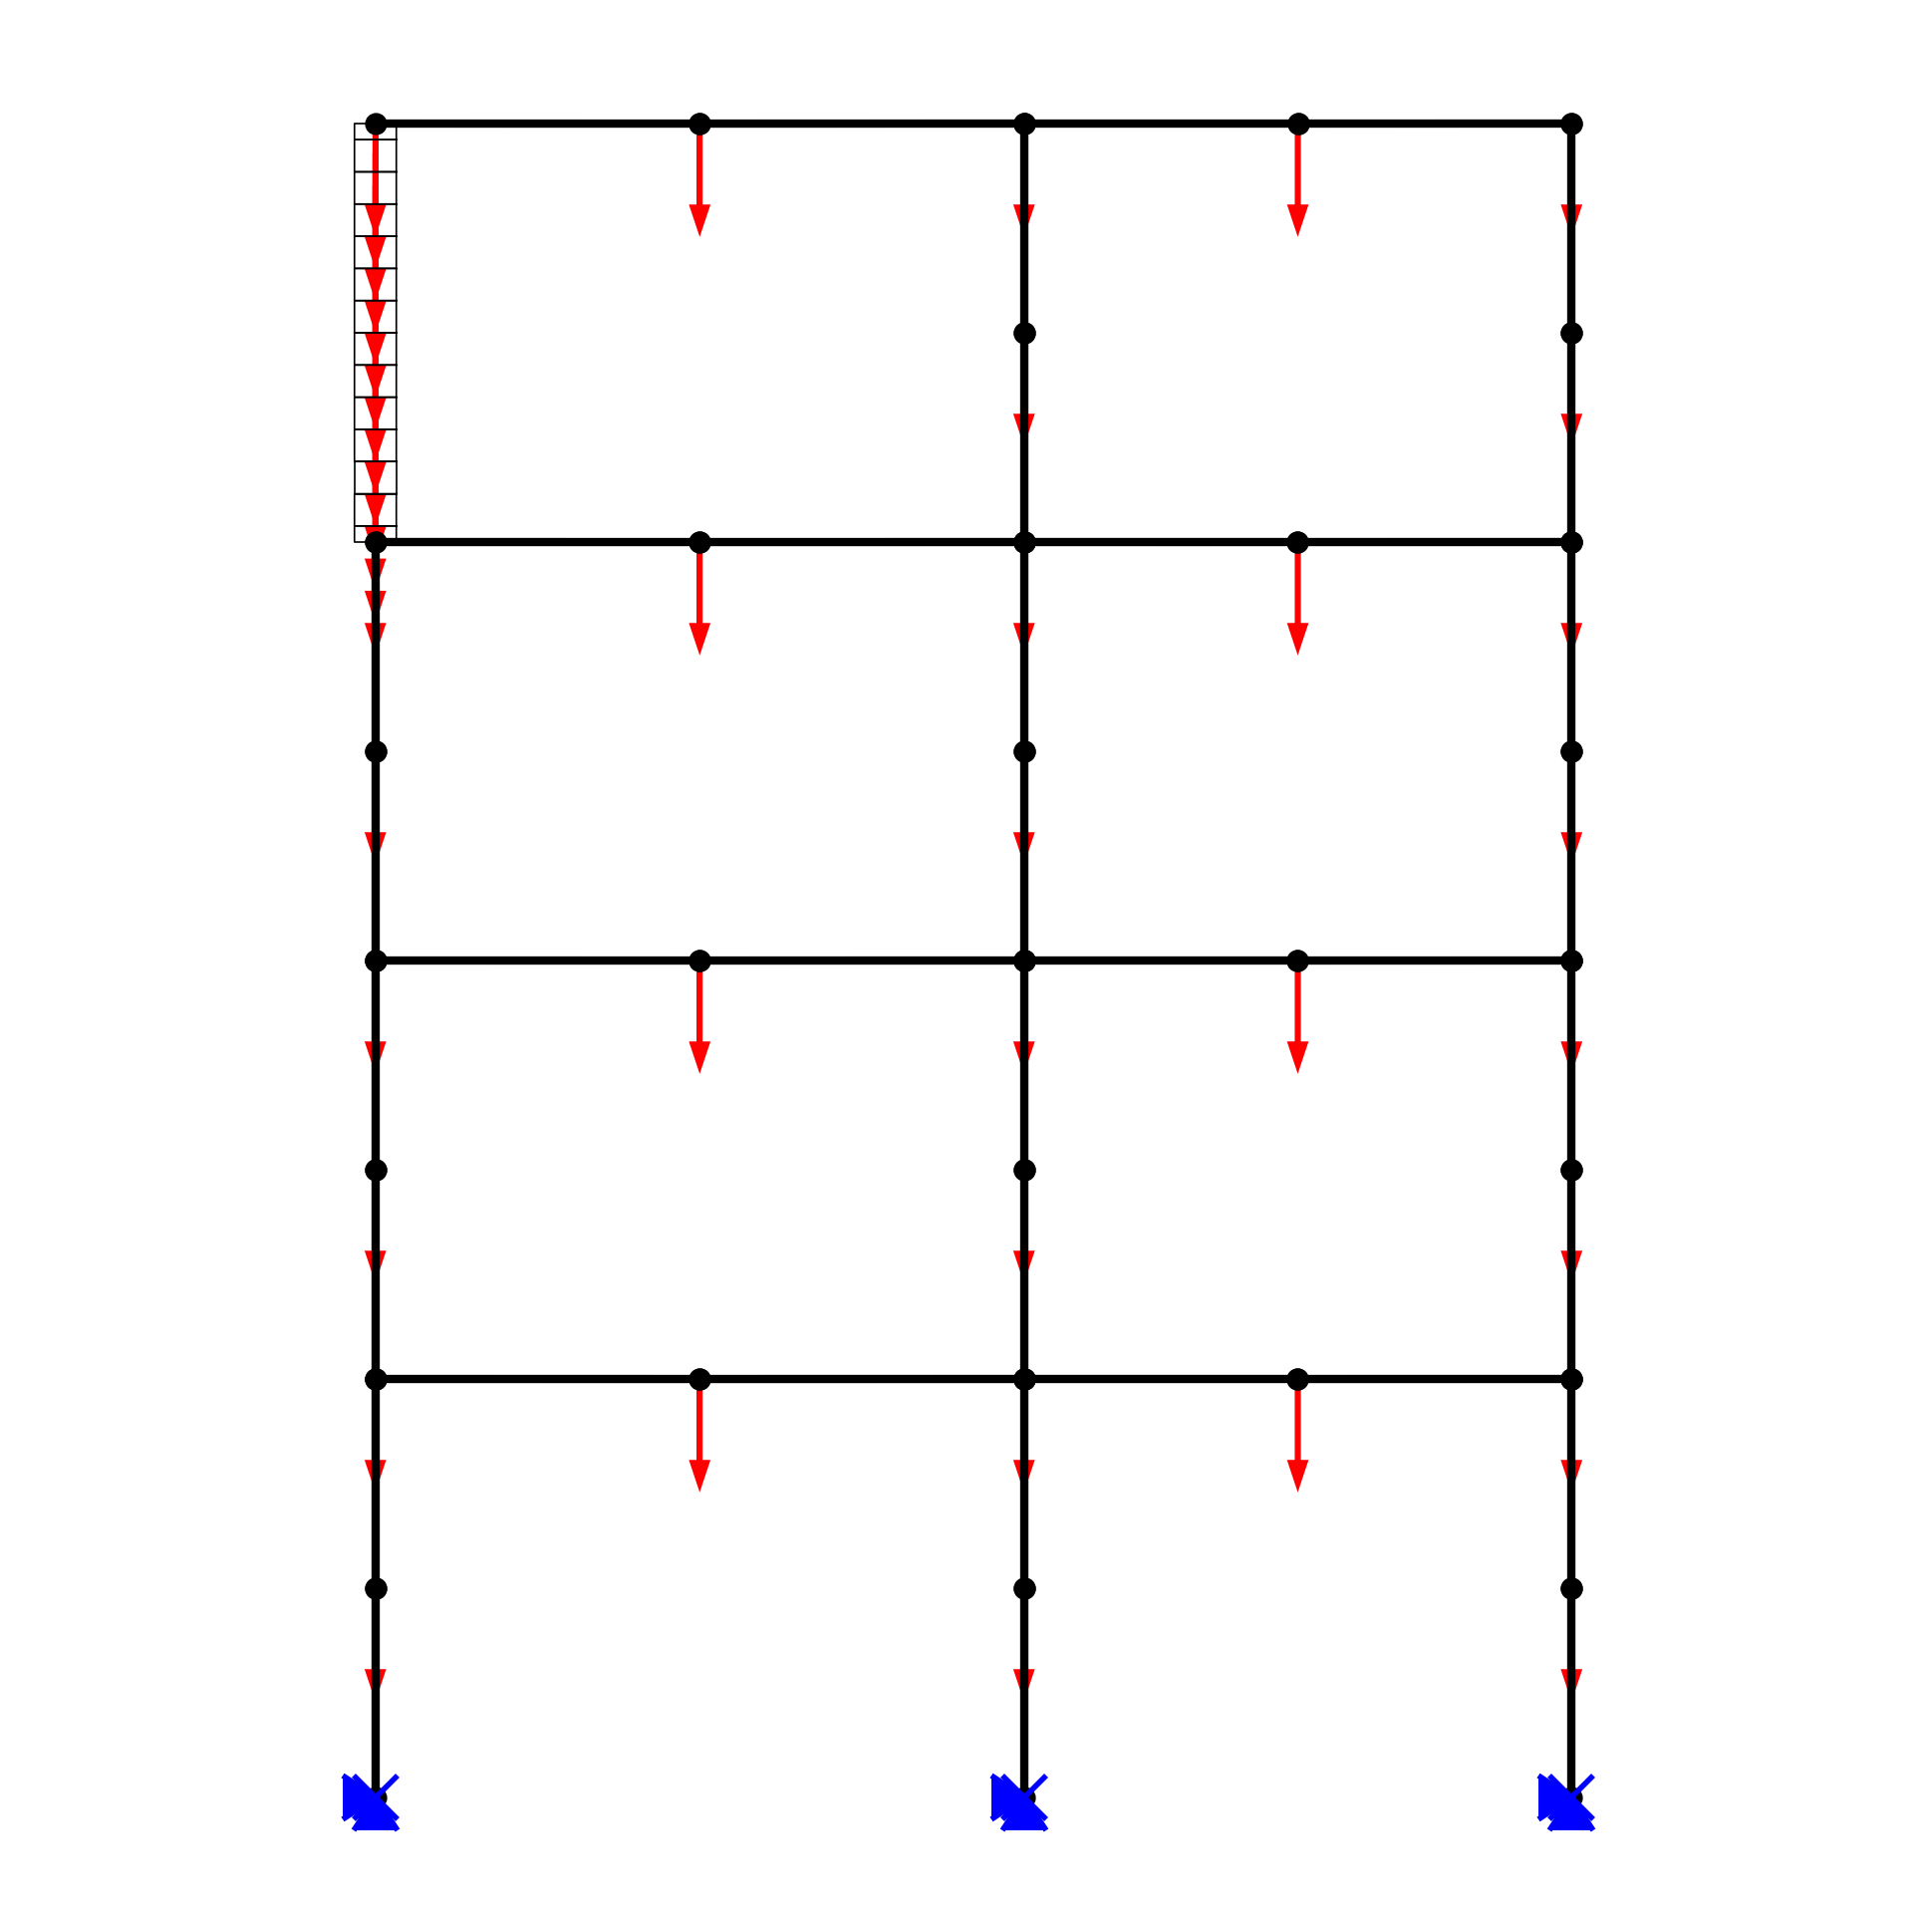

In [19]:
St.impose_dyn_excitation(14, 0, disp, dt_new)
St.impose_dyn_excitation(17, 0, disp, dt_new)
St.impose_dyn_excitation(20, 0, disp, dt_new)

Meth = 'HHT'

St.set_damping_properties(xsi=0.05, damp_type='STIFF', stiff_type='TAN_LG')

St.solve_dyn_nonlinear(11.6, dt_new, Meth=Meth, lmbda=None, filename=f'Results_test_1_CoMa_wall', dir_name=save_path)

St.plot_structure(scale=1, plot_forces=True, plot_cf=False)

St.save_structure(filename='Test_1_CoMa_wall')

## Video of the simulation

In [20]:
import matplotlib as mpl

# To have a nice LaTeX rendering (import LaTeX)
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']  # Example of a LaTeX font
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb, amsfonts}'

import matplotlib.pyplot as plt
from scipy import linalg
import pickle

import h5py
import os
import sys
import pathlib
import numpy as np
import cv2

In [21]:
folder = pathlib.Path(
    'C:/Users/giaco/OneDrive/Desktop/LOUVAIN-LA-NEUVE/MODELING/HybriDFEM-3-master LATEST UPDATE/Objects')
sys.path.append(str(folder))

import Structure

save_path = os.getcwd()

In [22]:
folder = pathlib.Path(
    r'C:/Users/giaco/OneDrive/Desktop/LOUVAIN-LA-NEUVE/MODELING/HybriDFEM-3-master LATEST UPDATE/Objects')
sys.path.append(str(folder))

import Structure

with open('Test_1_CoMa_wall.pkl', 'rb') as file:
    St = pickle.load(file)

files = [f for f in os.listdir() if f.endswith('_NWK_g=0.5_b=0.25.h5') and f.startswith('Results_test_1_CoMa_wall')]
files.sort()
h5_file = files[0]

with h5py.File(h5_file, 'r') as hf:
    last_conv = hf['Last_conv'][()]
    U_conv = hf['U_conv'][:, :last_conv]
    Time = hf['Time'][:last_conv]

# Crea o svuota la cartella Frames
frames_path = os.path.join(os.getcwd(), 'Frames_Test_1_CoMa_wall')
pathlib.Path(frames_path).mkdir(exist_ok=True)
for f in os.listdir(frames_path):
    os.unlink(os.path.join(frames_path, f))

# Parametri video
fps = 20
frames_needed = int(Time[-1] * fps)
ratio = max(int(len(Time) / frames_needed), 1)
power = int(np.ceil(np.log10(frames_needed)))

# Salvataggio frame
for i in range(frames_needed):
    St.U = U_conv[:, i * ratio]
    saveto = os.path.join(frames_path, f'Frame{i:0{power}d}.png')
    St.plot_structure(scale=1, plot_cf=False, plot_forces=False, plot_supp=False,
                      show=False, save=saveto, lims=None)  # lims=None abilita l'autoscale

# Creazione video
frame_pattern = os.path.join(frames_path, f'Frame%0{power}d.png')
frame_filenames = [frame_pattern % i for i in range(frames_needed)]
first_frame = cv2.imread(frame_filenames[0])
height, width, layers = first_frame.shape

video_filename = 'Video_Test_1_CoMa_wall_NWK.mp4'
video = cv2.VideoWriter(video_filename, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
for fname in frame_filenames:
    video.write(cv2.imread(fname))
video.release()

# Cancella i frame
for f in os.listdir(frames_path):
    os.unlink(os.path.join(frames_path, f))

print(f'Video completato: {video_filename}') 

Video completato: Video_Test_1_CoMa_wall_NWK.mp4
